In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2]:
def import_data(path:str):
    df = pd.read_csv(path)
    return df

def data_info(df:pd.DataFrame):
    print(df.head(5))
    print("-------------")
    print(df.shape)
    print("-------------")
    print(df.describe().T)
    print("-------------")
    print(df.info)

In [3]:
df = import_data("car_price_prediction_.csv")

# Data Summary

In [4]:
data_info(df)

   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  
-------------
(2500, 10)
-------------
              count           mean           std      min        25%  \
Car ID       2500.0    1250.500000    721.832160     1.00    625.750   
Year         2500.0    2011.626800      6.991700  2000.00   2005.000   
Engine Size  2500.0       3.465240      1.432053     1.00      2.200   
Mileage      2500.0  149749.844800  87919.

In [5]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

# Exploratory data analysis

## Removing Car ID from the dataset

In [6]:
df_new = df.drop(columns="Car ID")

In [7]:
df_new.head(5)

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


## Analysis of numeric data

### Year vs Price

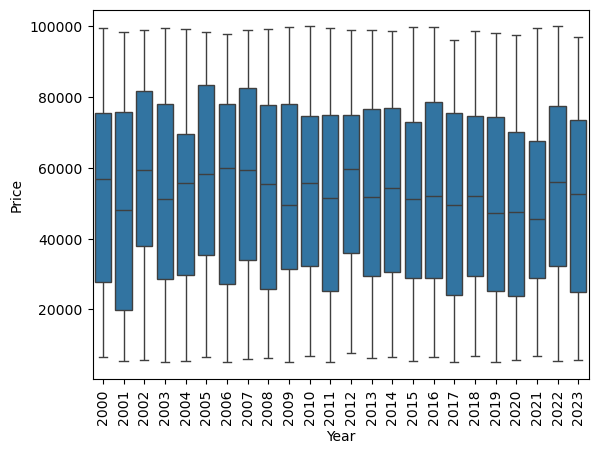

In [8]:
sns.boxplot(data=df_new, x="Year", y="Price")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Year'>

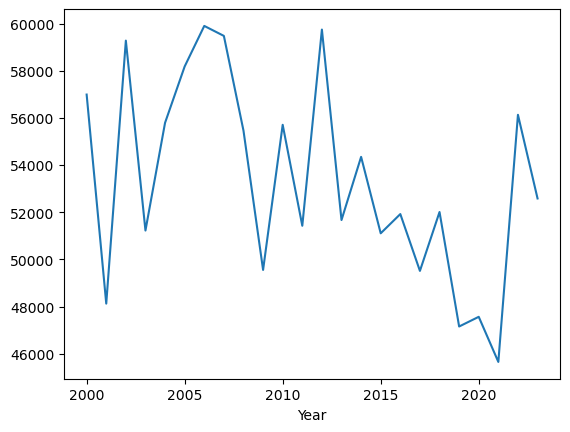

In [10]:
df_new.groupby("Year")["Price"].median().plot()

### Engine size vs Price

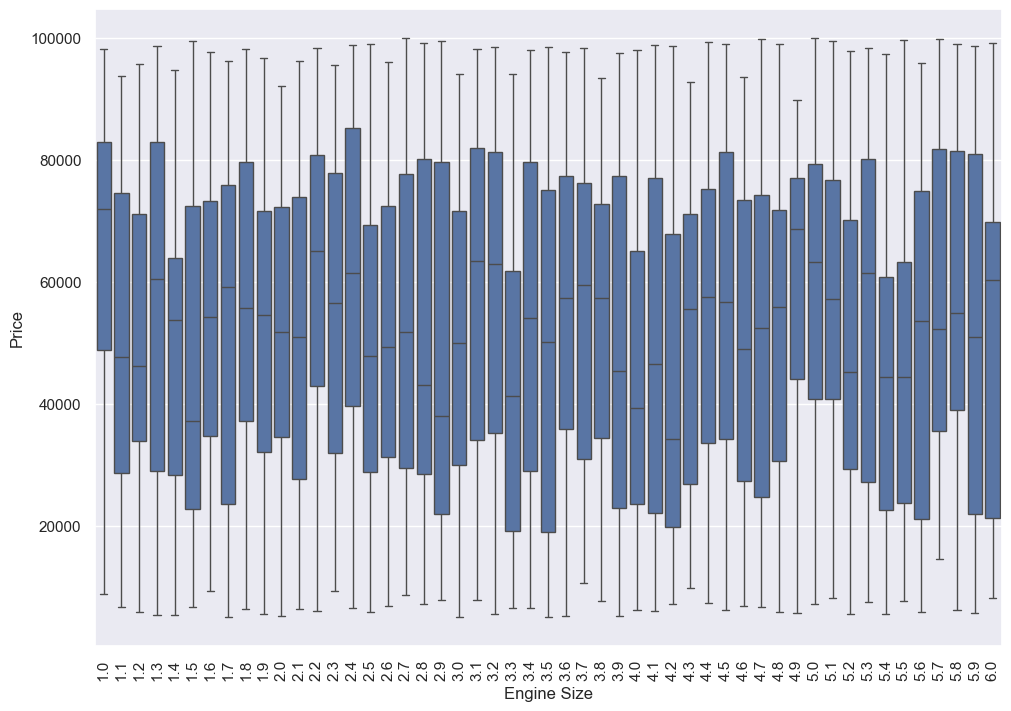

In [18]:
figure = sns.boxplot(data=df_new, x="Engine Size", y="Price")
#sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
#plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.show()

### Mileage vs Price

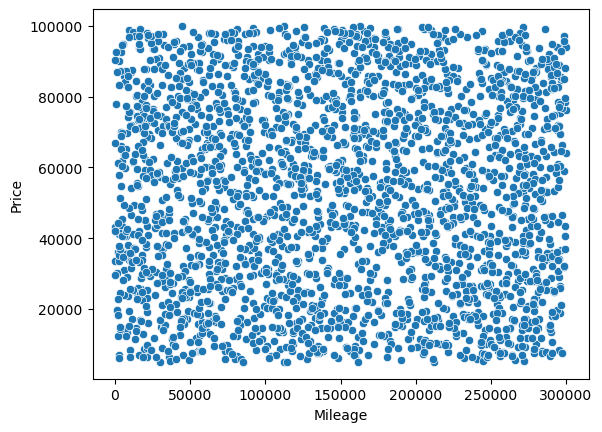

In [19]:
sns.scatterplot(data=df_new, x="Mileage", y="Price")
plt.show()

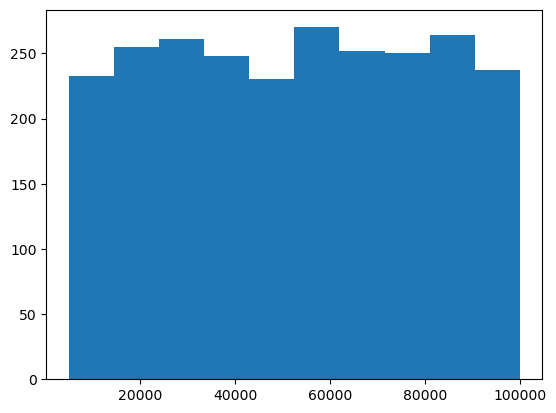

In [22]:
plt.hist(df_new["Price"])
plt.show()

## Categorical data

In [23]:
df_new["Brand"].value_counts()

Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64

<Axes: xlabel='Brand', ylabel='Price'>

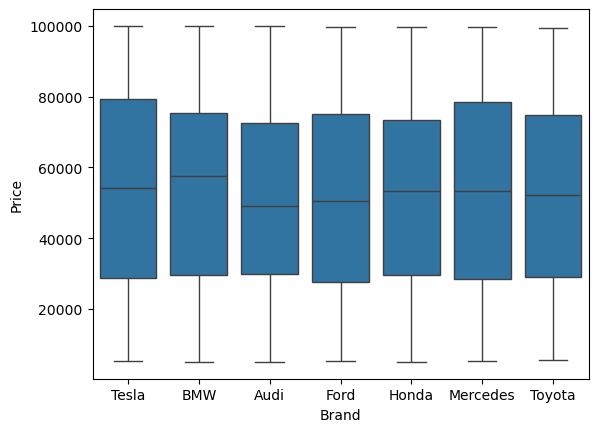

In [24]:
sns.boxplot(data=df_new, x="Brand", y="Price")

In [26]:
df_new.groupby(["Brand","Model"])["Year"].count()

Brand     Model   
Audi      A3           98
          A4           96
          Q5           79
          Q7           95
BMW       3 Series     93
          5 Series     93
          X3           92
          X5           80
Ford      Explorer     86
          Fiesta      103
          Focus        81
          Mustang      77
Honda     Accord       88
          CR-V         95
          Civic        80
          Fit          89
Mercedes  C-Class      92
          E-Class      89
          GLA          92
          GLC          80
Tesla     Model 3      87
          Model S      79
          Model X      93
          Model Y      89
Toyota    Camry        90
          Corolla     103
          Prius        93
          RAV4         88
Name: Year, dtype: int64

### Number of models 

In [49]:
df_new.groupby(["Brand","Model","Condition"])["Price"].count()#.reset_index(name="counts").sort_values(by="counts", ascending=False)

Brand   Model  Condition
Audi    A3     Like New     30
               New          37
               Used         31
        A4     Like New     32
               New          33
                            ..
Toyota  Prius  New          34
               Used         36
        RAV4   Like New     23
               New          34
               Used         31
Name: Price, Length: 84, dtype: int64

### Condition

<Axes: xlabel='Condition', ylabel='Price'>

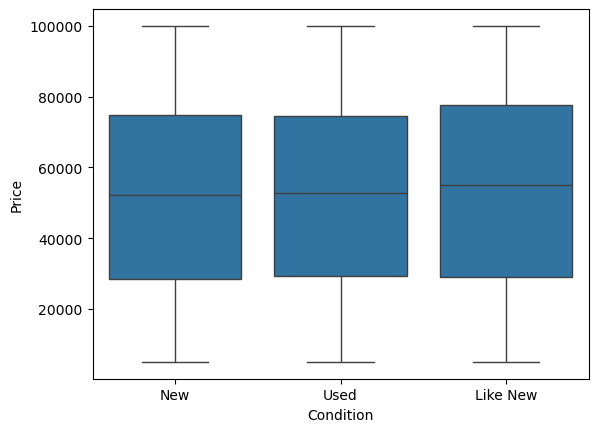

In [27]:
sns.boxplot(data=df_new, x="Condition", y="Price")

In [13]:
brand_cond_price_med = df_new.groupby(["Brand","Condition"])["Price"].median().reset_index()
brand_cond_price_avg = df_new.groupby(["Brand","Condition"])["Price"].mean().reset_index()

In [17]:
brand_cond_model_price_med = df_new.groupby(["Brand","Model","Condition"])["Price"].median().reset_index()
brand_cond_model_price_avg = df_new.groupby(["Brand","Model","Condition"])["Price"].mean().reset_index()

In [7]:
import plotly.express as px

In [14]:
fig = px.treemap(brand_cond_price_med, path=["Brand", "Condition"], values="Price", color="Price")
fig.show()

In [15]:
fig = px.treemap(brand_cond_price_avg, path=["Brand", "Condition"], values="Price", color="Price")
fig.show()

In [19]:
fig = px.treemap(brand_cond_model_price_med, path=["Brand","Model","Condition"], values="Price", color="Price")
fig.show()

In [18]:
fig = px.treemap(brand_cond_model_price_avg, path=["Brand","Model","Condition"], values="Price", color="Price")
fig.show()

### Fuel Type

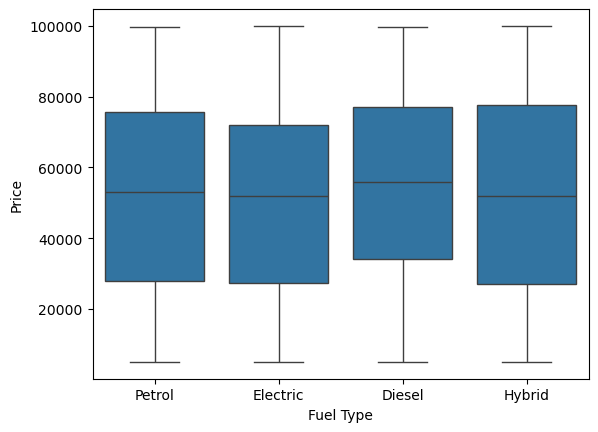

In [29]:
sns.boxplot(data=df_new, x="Fuel Type", y="Price")
plt.show()

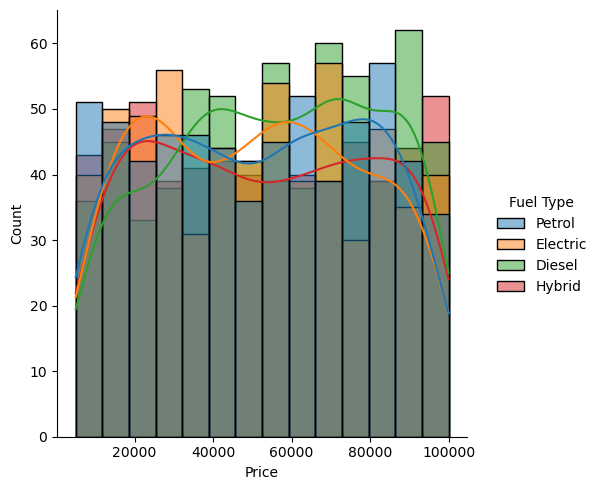

In [33]:
sns.displot(data=df_new, x="Price", hue="Fuel Type", kde=True)
#sns.kdeplot(data=df_new, x="Price", hue="Fuel Type")

# Data Preprocessing

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [51]:
cols = ['Brand', 'Fuel Type', 'Transmission','Condition', 'Model']
encoder = OneHotEncoder()


encoder.fit(df_new[cols])
#df_new[['Brand', 'Fuel Type', 'Transmission','Condition', 'Model']]

OneHotEncoder()

In [64]:
new_df = encoder.transform(df_new[cols]).toarray()

In [65]:
new_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [66]:
encoder.get_feature_names_out(cols)

array(['Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Mercedes', 'Brand_Tesla', 'Brand_Toyota',
       'Fuel Type_Diesel', 'Fuel Type_Electric', 'Fuel Type_Hybrid',
       'Fuel Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Condition_Like New', 'Condition_New',
       'Condition_Used', 'Model_3 Series', 'Model_5 Series', 'Model_A3',
       'Model_A4', 'Model_Accord', 'Model_C-Class', 'Model_CR-V',
       'Model_Camry', 'Model_Civic', 'Model_Corolla', 'Model_E-Class',
       'Model_Explorer', 'Model_Fiesta', 'Model_Fit', 'Model_Focus',
       'Model_GLA', 'Model_GLC', 'Model_Model 3', 'Model_Model S',
       'Model_Model X', 'Model_Model Y', 'Model_Mustang', 'Model_Prius',
       'Model_Q5', 'Model_Q7', 'Model_RAV4', 'Model_X3', 'Model_X5'],
      dtype=object)

In [67]:
new_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [68]:
encoded_df = pd.DataFrame(new_df, columns=encoder.get_feature_names_out(cols))

In [69]:
encoded_df

,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
final_df = df_new.drop(columns=cols)

In [73]:
final_df = pd.concat([final_df, encoded_df], axis=1)
final_df.head(5)

,Year,Engine Size,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,2016,2.3,114832,26613.92,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,4.4,143190,14679.61,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,4.5,181601,44402.61,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,4.1,68682,86374.33,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,2.6,223009,73577.10,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
X = final_df.drop(columns="Price")
y = final_df["Price"]

# Spliting data

In [75]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Modeling

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor

In [77]:
rf = RandomForestRegressor(n_estimators=300, random_state=random_state)

In [79]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [80]:
y_pred = rf.predict(X_test)

In [81]:
MSE(y_true=y_test, y_pred=y_pred)

792984682.0746479

In [83]:
root_mean_squared_error(y_true=y_test, y_pred=y_pred)

28159.9837016048

### Linear Regression

In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE: {}".format(MSE(y_pred=y_pred, y_true=y_test)))
print("RMSE: {}".format(root_mean_squared_error(y_pred=y_pred, y_true=y_test)))

MSE: 774429251.7619334
RMSE: 27828.568985162234


### Ridge

In [85]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("MSE: {}".format(MSE(y_pred=y_pred, y_true=y_test)))
print("RMSE: {}".format(root_mean_squared_error(y_pred=y_pred, y_true=y_test)))

MSE: 774042921.0480074
RMSE: 27821.626858399337


### Lasso

In [86]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("MSE: {}".format(MSE(y_pred=y_pred, y_true=y_test)))
print("RMSE: {}".format(root_mean_squared_error(y_pred=y_pred, y_true=y_test)))

MSE: 774318851.7711765
RMSE: 27826.58534156098


### All the models

In [88]:
model_list = ["Random Forest", "Linear Regression", "Ridge", "Lasso"]
models = {"Random Forest":RandomForestRegressor(),
          "Linear Regression":LinearRegression(),
          "Ridge": Ridge(),
          "Lasso":Lasso()}

In [90]:
for i in model_list:
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MSE of {}: {}".format(model, MSE(y_pred=y_pred, y_true=y_test)))
    print("RMSE of {}: {}".format(model, root_mean_squared_error(y_pred=y_pred, y_true=y_test)))
    print("r2 score: {}".format(r2_score(y_pred=y_pred, y_true=y_test)))

MSE of RandomForestRegressor(): 792089030.114461
RMSE of RandomForestRegressor(): 28144.076288172277
r2 score: -0.046060958421004994
MSE of LinearRegression(): 774429251.7619334
RMSE of LinearRegression(): 27828.568985162234
r2 score: -0.022738826733007755
MSE of Ridge(): 774042921.0480074
RMSE of Ridge(): 27821.626858399337
r2 score: -0.022228624645221462
MSE of Lasso(): 774318851.7711765
RMSE of Lasso(): 27826.58534156098
r2 score: -0.022593028576802787


In [92]:
estimators = [("Random Forest",RandomForestRegressor()),
              ("Linear Regression",LinearRegression()),
              ("Ridge", Ridge()),
              ("Lasso",Lasso())]

In [94]:
reg = StackingRegressor(estimators=estimators, final_estimator=AdaBoostRegressor())

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE of StackingRegressor: {}".format(MSE(y_pred=y_pred, y_true=y_test)))
print("RMSE of StackingRegressor: {}".format(root_mean_squared_error(y_pred=y_pred, y_true=y_test)))
print("r2 score of StackingRegressor: {}".format(r2_score(y_pred=y_pred, y_true=y_test)))

MSE of StackingRegressor: 760020748.4334751
RMSE of StackingRegressor: 27568.473814004923
r2 score of StackingRegressor: -0.003710444533343571


In [40]:
mu, sigma = 0, 0.1

x = np.random.normal(mu, sigma, 100)
y = np.random.normal(mu, sigma, 100)

new = r2_score(x,y)

In [41]:
new

-0.8972647251132182